# Twitter sentiment
Basic first pass analyses of twitter sentiment. This notebook is really about setting up my initial data scraping.

Will base some of this on the tutorial [here](https://dev.to/rodolfoferro/sentiment-analysis-on-trumpss-tweets-using-python-).

Also potentially useful:
- https://marcobonzanini.com/2015/03/02/mining-twitter-data-with-python-part-1/
- https://mediaeffectsresearch.wordpress.com/constructing-a-retweet-network/
- http://www.alex-hanna.com/tworkshops/lesson-7-mention-network-analysis/
- https://towardsdatascience.com/generating-twitter-ego-networks-detecting-ego-communities-93897883d255
- https://datascienceplus.com/twitter-analysis-with-python/
- https://www.slideshare.net/giladlotan/pydata-gilad-networkxupload


In [2]:
# General:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


Set up twitter access.

In [3]:
# We import our access keys:
from credentials import *    # This will allow us to use the keys as variables

# API's setup:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api


Set up tweet extraction.

In [5]:
# We create an extractor object:
extractor = twitter_setup()

# We create a tweet list as follows:
tweets = extractor.user_timeline(screen_name="PyTorch", count=200)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()


Number of tweets extracted: 200.

5 recent tweets:

RT @jeremyphoward: Practical Deep Learning for Coders, 2019 edition, is now available. With a shiny new video player with searchable transc…

If you live under a rock, and do not know what that is, it's https://t.co/KIPAos6MTL
Online collaborative notebooks… https://t.co/1BiXJ4Udhs

PyTorch is now installed by default on Google Colaboratory.
Go ahead and `import torch`, `import torchvision`, `imp… https://t.co/K1IU93XP0g

@RitchieNg @TensorFlow @ylecun pytorch's default initialization is actually from lecun'99 "Efficient Backprop"

@deliprao https://t.co/uaGiGCJxxW



In [6]:
# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data.head(10))


,Tweets
0,RT @jeremyphoward: Practical Deep Learning for...
1,"If you live under a rock, and do not know what..."
2,PyTorch is now installed by default on Google ...
3,@RitchieNg @TensorFlow @ylecun pytorch's defau...
4,@deliprao https://t.co/uaGiGCJxxW
5,RT @fb_engineering: We are open-sourcing a new...
6,RT @lmazare: The PyTorch/ocaml bindings should...
7,"RT @jeremyphoward: Really proud to share ""What..."
8,Delira - Deep Learning in Radiology\nA Lightwe...
9,RT @edgarriba: PyTorch Geometry v0.1.1 is out ...


In [7]:
# Internal methods of a single tweet object:
print(dir(tweets[0]))


['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'retweet', 'retweet_count', 'retweeted', 'retweeted_status', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [8]:
# We print info from the first tweet:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)


1088893915456028673
2019-01-25 20:18:34
Twitter Web Client
0
903
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'jeremyphoward', 'name': 'Jeremy Howard', 'id': 175282603, 'id_str': '175282603', 'indices': [3, 17]}], 'urls': []}


In [9]:
# We add relevant data:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])


In [10]:
# Display of first 10 elements from dataframe:
display(data.head(10))


,Tweets,len,ID,Date,Source,Likes,RTs
0,RT @jeremyphoward: Practical Deep Learning for...,140,1088893915456028673,2019-01-25 20:18:34,Twitter Web Client,0,903
1,"If you live under a rock, and do not know what...",140,1088882891403259909,2019-01-25 19:34:46,Twitter Web Client,158,29
2,PyTorch is now installed by default on Google ...,140,1088882504700968960,2019-01-25 19:33:14,Twitter Web Client,1521,445
3,@RitchieNg @TensorFlow @ylecun pytorch's defau...,110,1088876243695661057,2019-01-25 19:08:21,Twitter Web Client,49,4
4,@deliprao https://t.co/uaGiGCJxxW,33,1088876049218355207,2019-01-25 19:07:35,Twitter Web Client,5,0
5,RT @fb_engineering: We are open-sourcing a new...,140,1087829562480881664,2019-01-22 21:49:13,Twitter Web Client,0,236
6,RT @lmazare: The PyTorch/ocaml bindings should...,140,1086848463302647808,2019-01-20 04:50:40,Twitter Web Client,0,11
7,"RT @jeremyphoward: Really proud to share ""What...",140,1085588508595515398,2019-01-16 17:24:04,Twitter Web Client,0,395
8,Delira - Deep Learning in Radiology\nA Lightwe...,139,1085284497397112838,2019-01-15 21:16:02,Twitter Web Client,256,90
9,RT @edgarriba: PyTorch Geometry v0.1.1 is out ...,140,1083109932742987777,2019-01-09 21:15:05,Twitter Web Client,0,36


## Visualisation and basic stats.

In [11]:
# We extract the mean of lenghts:
mean = np.mean(data['len'])

print("The lenght's average in tweets: {}".format(mean))


The lenght's average in tweets: 124.71


In [12]:
# We extract the tweet with more FAVs and more RTs:

fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))


The tweet with more likes is: 
Microsoft VSCode integrates deeply with PyTorch out of the box.

As @aerinykim highlights:

1. It shows values insi… https://t.co/bBpv4DxKlH
Number of likes: 1649
140 characters.

The tweet with more retweets is: 
RT @henddkn: Tataa ! I'm happy to announce the release of #GANpaint today - based on the new #GANdissect method, which helps to identify wh…
Number of retweets: 1327
140 characters.



In [13]:
# We create time series for data:

tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])


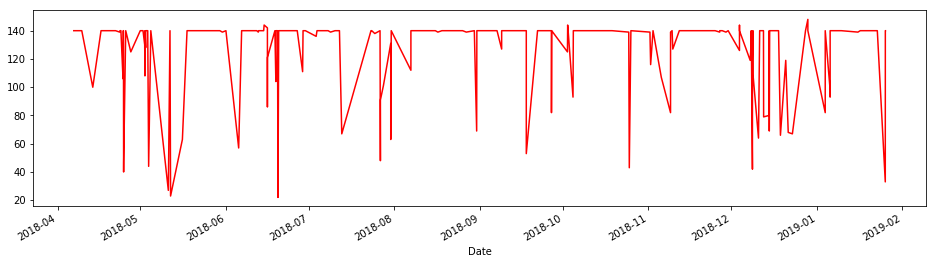

In [14]:
# Lenghts along time:
tlen.plot(figsize=(16,4), color='r');


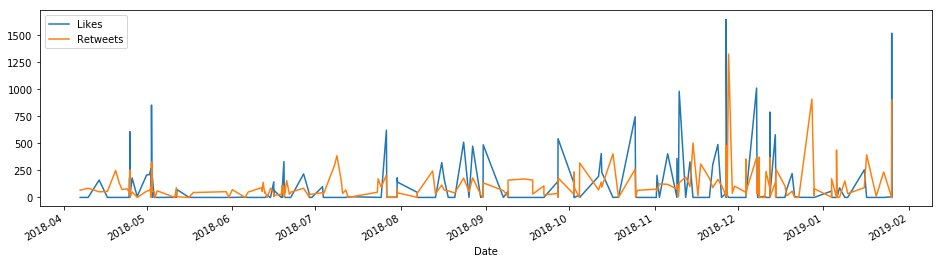

In [15]:
# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);


In [16]:
# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))


Creation of content sources:
* Twitter Web Client
* Twitter for iPhone


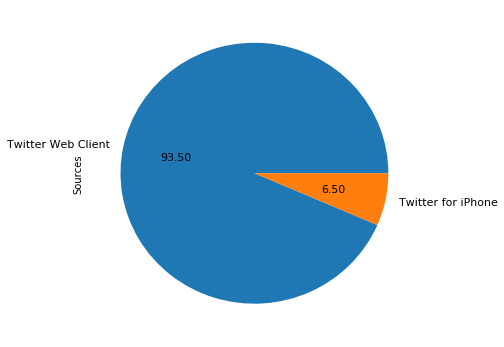

In [17]:
# We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));


## Sentiment analysis

In [19]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analyze_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1


In [21]:
# We create a column with the result of the analysis:
data['SA'] = np.array([ analyze_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(10))


,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,RT @jeremyphoward: Practical Deep Learning for...,140,1088893915456028673,2019-01-25 20:18:34,Twitter Web Client,0,903,1
1,"If you live under a rock, and do not know what...",140,1088882891403259909,2019-01-25 19:34:46,Twitter Web Client,158,29,1
2,PyTorch is now installed by default on Google ...,140,1088882504700968960,2019-01-25 19:33:14,Twitter Web Client,1521,445,0
3,@RitchieNg @TensorFlow @ylecun pytorch's defau...,110,1088876243695661057,2019-01-25 19:08:21,Twitter Web Client,49,4,0
4,@deliprao https://t.co/uaGiGCJxxW,33,1088876049218355207,2019-01-25 19:07:35,Twitter Web Client,5,0,0
5,RT @fb_engineering: We are open-sourcing a new...,140,1087829562480881664,2019-01-22 21:49:13,Twitter Web Client,0,236,1
6,RT @lmazare: The PyTorch/ocaml bindings should...,140,1086848463302647808,2019-01-20 04:50:40,Twitter Web Client,0,11,0
7,"RT @jeremyphoward: Really proud to share ""What...",140,1085588508595515398,2019-01-16 17:24:04,Twitter Web Client,0,395,1
8,Delira - Deep Learning in Radiology\nA Lightwe...,139,1085284497397112838,2019-01-15 21:16:02,Twitter Web Client,256,90,1
9,RT @edgarriba: PyTorch Geometry v0.1.1 is out ...,140,1083109932742987777,2019-01-09 21:15:05,Twitter Web Client,0,36,1


In [22]:
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]


In [24]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage of negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))


Percentage of positive tweets: 51.5%
Percentage of neutral tweets: 41.5%
Percentage of negative tweets: 7.0%


## Retweet analysis
Basing this next piece of analysis on the tutorial [here](https://mediaeffectsresearch.wordpress.com/constructing-a-retweet-network/).

Want to create some kind of mention network and visualise it...

NB: currently BELOW DOESN'T WORK!

In [30]:
#F_NAME = 'mp_retweet_data_({%s}_to_{%s}).json'.format(start_date.isoformat(), end_date.isoformat())
F_NAME = 'retweet_data.json'
tweets_read = 0
sn_read = 0
with open(F_NAME,'w') as f_out:
    for screen_name in screen_name_list:
        try:
            search = extractor.user_timeline(screen_name = screen_name, min_id = min_id, max_id = max_id, include_rts = True)
        except tweepy.TweepError:
            pass # can't get records from this user, probably a protected account and it is safe to skip
        else:
            for result in search:
                tweet = result._json
                if tweet.get('retweeted_status'):
                    json.dump(tweet, f_out)
                    f_out.write('\n')
                    tweets_read += 1
            sn_read += 1
            print('\rUsers read:\t%d/%d\tRetweets read:\t%d' % (sn_read, len(screen_name_list), tweets_read))

print('\rUsers read:\t%d/%d\tRetweets read:\t%d\tFinished!' % (sn_read, len(screen_name_list), tweets_read))

NameError: name 'screen_name_list' is not defined